In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r'A:\MLZoomCamps\\raw.githubusercontent.com_alexeygrigorev_datasets_master_housing.csv')

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<Axes: xlabel='median_house_value', ylabel='Count'>

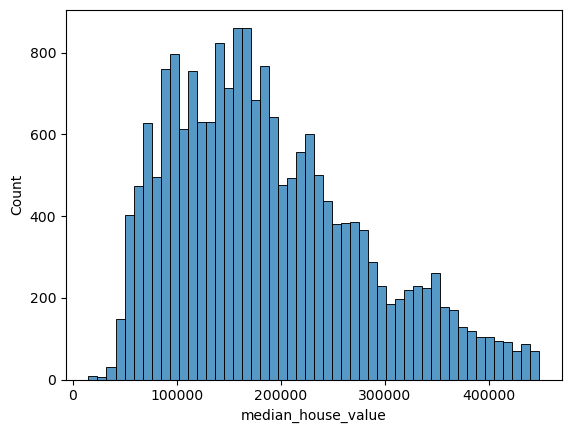

In [5]:
sns.histplot(df.median_house_value[df.median_house_value < 450000],bins=50)

In [6]:
df_idx = df[
    (df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')
]
df_filtered = df_idx[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]]
df_filtered = df_filtered.reset_index(drop=True)

In [7]:
df_filtered.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [8]:
df_population_median = df_filtered['population'].quantile()
print(df_population_median)

1195.0


In [9]:
# Splitting the data into train, testing and validation. Also, applying the log transformation data on the filtered data set and then splitting. 
n  = len(df_filtered)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_filtered.median_house_value = np.log1p(df_filtered.median_house_value)
df_train = df_filtered.iloc[idx[:n_train]]
df_val = df_filtered.iloc[idx[n_train:n_train+n_val]]
df_test = df_filtered.iloc[idx[n_train+n_val:]]
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [10]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [11]:
base = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

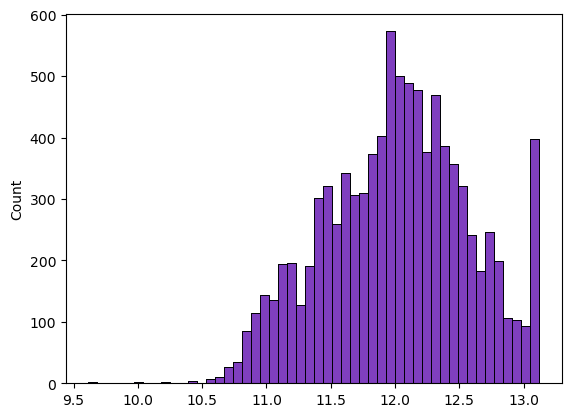

In [12]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [13]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [14]:
RMSE_Train = rmse(y_train, y_pred)
round(RMSE_Train,2)

0.0

In [15]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [16]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
RMSE_Val = rmse(y_val, y_pred)
round(RMSE_Val,2)

0.0

In [17]:
# using mean to replace the empty rows
mean_value = df_train['total_bedrooms'].mean()
df_train['total_bedrooms'].fillna(value=mean_value,inplace=True)
X_Trian_mean = df_train[base].values
w0_mean, w_mean = train_linear_regression(X_Trian_mean, y_train)

y_pred_mean = w0_mean + X_train.dot(w_mean)

C:\Users\saiku\AppData\Local\Temp\ipykernel_16148\3897569811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['total_bedrooms'].fillna(value=mean_value,inplace=True)


<Axes: ylabel='Count'>

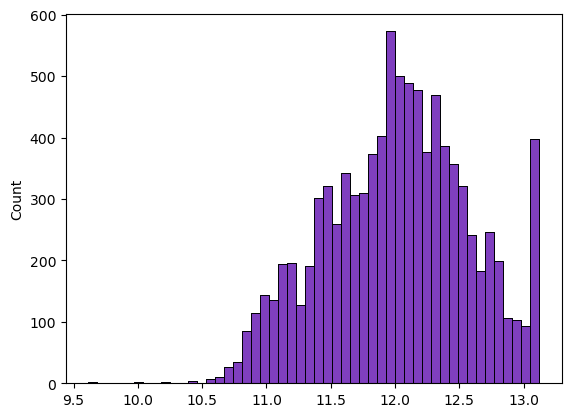

In [18]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [19]:
def rmse(y, y_pred_mean):
    se = (y - y_pred_mean) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [20]:
RMSE_Train_mean = rmse(y_train, y_pred_mean)
round(RMSE_Train_mean,2)

0.0